# First let's import the packages we will use in this project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Now we need to read in the data

In [2]:
url = "https://raw.githubusercontent.com/blackcrowX/Data_Analytics_Projects/main/Datasets/popular_10000_movies_tmdb.csv"
df = pd.read_csv(url)

# Now let's take a look at the data

In [3]:
df

,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline
0,758323,The Pope's Exorcist,2023-04-05,"['Horror', 'Mystery', 'Thriller']",English,7.4,619,5089.969,"Father Gabriele Amorth, Chief Exorcist of the ...",18000000,"['Screen Gems', '2.0 Entertainment', 'Jesus & ...",65675816,103,Inspired by the actual files of Father Gabriel...
1,640146,Ant-Man and the Wasp: Quantumania,2023-02-15,"['Action', 'Adventure', 'Science Fiction']",English,6.6,2294,4665.438,Super-Hero partners Scott Lang and Hope van Dy...,200000000,"['Marvel Studios', 'Kevin Feige Productions']",464566092,125,Witness the beginning of a new dynasty.
2,502356,The Super Mario Bros. Movie,2023-04-05,"['Animation', 'Adventure', 'Family', 'Fantasy'...",English,7.5,1861,3935.550,"While working underground to fix a water main,...",100000000,"['Universal Pictures', 'Illumination', 'Ninten...",1121048165,92,NaN
3,868759,Ghosted,2023-04-18,"['Action', 'Comedy', 'Romance']",English,7.2,652,2791.532,Salt-of-the-earth Cole falls head over heels f...,0,"['Skydance Media', 'Apple Studios']",0,120,Finding that special someone can be a real adv...
4,594767,Shazam! Fury of the Gods,2023-03-15,"['Action', 'Comedy', 'Fantasy', 'Adventure']",English,6.8,1510,2702.593,"Billy Batson and his foster siblings, who tran...",125000000,"['New Line Cinema', 'The Safran Company', 'DC ...",133437105,130,Oh. My. Gods.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,374473,"I, Daniel Blake",2016-10-21,['Drama'],English,7.7,1220,10.774,"A middle aged carpenter, who requires state we...",0,"['Why Not Productions', 'Wild Bunch', 'Sixteen...",15793051,100,NaN
9996,16774,Hellboy Animated: Sword of Storms,2006-10-28,"['TV Movie', 'Fantasy', 'Animation', 'Action',...",English,6.3,99,12.739,A folklore professor becomes unwittingly posse...,0,"['IDT Entertainment', 'Film Roman']",0,73,NaN
9997,13564,Return to House on Haunted Hill,2007-10-03,"['Horror', 'Thriller']",English,5.6,263,12.769,Eight years have passed since Sara Wolfe and E...,0,"['Dark Castle Entertainment', 'Warner Premiere']",0,81,NaN
9998,482204,My Sister-in-law's Job,2017-08-31,"['Drama', 'Romance']",Korean,5.0,5,10.425,An erotic film that depicts the dangerous rela...,0,[],0,89,NaN


# We need to see if we have any missing data

Let's loop through the data and see if there is anything missing

In [4]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0%
title - 0%
release_date - 0%
genres - 0%
original_language - 0%
vote_average - 0%
vote_count - 0%
popularity - 0%
overview - 1%
budget - 0%
production_companies - 0%
revenue - 0%
runtime - 0%
tagline - 28%


# Data Types for our columns

In [5]:
print(df.dtypes)

id                        int64
title                    object
release_date             object
genres                   object
original_language        object
vote_average            float64
vote_count                int64
popularity              float64
overview                 object
budget                    int64
production_companies     object
revenue                   int64
runtime                   int64
tagline                  object
dtype: object


# Are there any Outliers?

<Axes: >

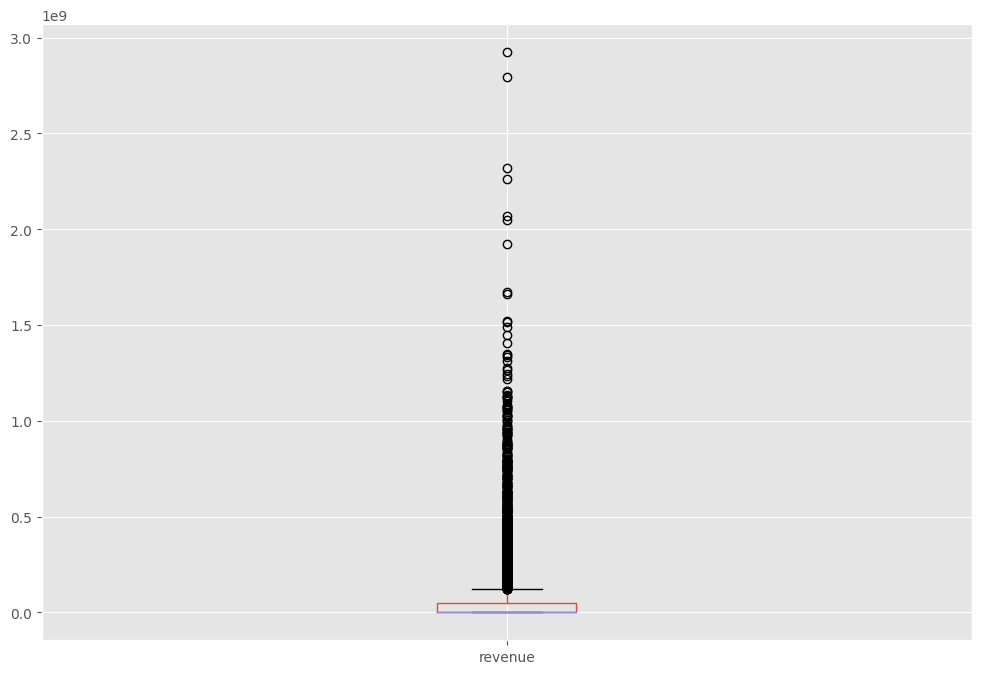

In [6]:
df.boxplot(column=['revenue'])

# Drop Duplicates

In [7]:
df.drop_duplicates()

,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline
0,758323,The Pope's Exorcist,2023-04-05,"['Horror', 'Mystery', 'Thriller']",English,7.4,619,5089.969,"Father Gabriele Amorth, Chief Exorcist of the ...",18000000,"['Screen Gems', '2.0 Entertainment', 'Jesus & ...",65675816,103,Inspired by the actual files of Father Gabriel...
1,640146,Ant-Man and the Wasp: Quantumania,2023-02-15,"['Action', 'Adventure', 'Science Fiction']",English,6.6,2294,4665.438,Super-Hero partners Scott Lang and Hope van Dy...,200000000,"['Marvel Studios', 'Kevin Feige Productions']",464566092,125,Witness the beginning of a new dynasty.
2,502356,The Super Mario Bros. Movie,2023-04-05,"['Animation', 'Adventure', 'Family', 'Fantasy'...",English,7.5,1861,3935.550,"While working underground to fix a water main,...",100000000,"['Universal Pictures', 'Illumination', 'Ninten...",1121048165,92,NaN
3,868759,Ghosted,2023-04-18,"['Action', 'Comedy', 'Romance']",English,7.2,652,2791.532,Salt-of-the-earth Cole falls head over heels f...,0,"['Skydance Media', 'Apple Studios']",0,120,Finding that special someone can be a real adv...
4,594767,Shazam! Fury of the Gods,2023-03-15,"['Action', 'Comedy', 'Fantasy', 'Adventure']",English,6.8,1510,2702.593,"Billy Batson and his foster siblings, who tran...",125000000,"['New Line Cinema', 'The Safran Company', 'DC ...",133437105,130,Oh. My. Gods.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,374473,"I, Daniel Blake",2016-10-21,['Drama'],English,7.7,1220,10.774,"A middle aged carpenter, who requires state we...",0,"['Why Not Productions', 'Wild Bunch', 'Sixteen...",15793051,100,NaN
9996,16774,Hellboy Animated: Sword of Storms,2006-10-28,"['TV Movie', 'Fantasy', 'Animation', 'Action',...",English,6.3,99,12.739,A folklore professor becomes unwittingly posse...,0,"['IDT Entertainment', 'Film Roman']",0,73,NaN
9997,13564,Return to House on Haunted Hill,2007-10-03,"['Horror', 'Thriller']",English,5.6,263,12.769,Eight years have passed since Sara Wolfe and E...,0,"['Dark Castle Entertainment', 'Warner Premiere']",0,81,NaN
9998,482204,My Sister-in-law's Job,2017-08-31,"['Drama', 'Romance']",Korean,5.0,5,10.425,An erotic film that depicts the dangerous rela...,0,[],0,89,NaN


# Order our Data a little bit to see

In [8]:
df.sort_values(by=['revenue'], inplace=False, ascending=False)

,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline
130,19995,Avatar,2009-12-15,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",English,7.6,29040,188.103,"In the 22nd century, a paraplegic Marine is di...",237000000,"['Dune Entertainment', 'Lightstorm Entertainme...",2923706026,162,Enter the world of Pandora.
325,299534,Avengers: Endgame,2019-04-24,"['Adventure', 'Science Fiction', 'Action']",English,8.3,23090,101.337,After the devastating events of Avengers: Infi...,356000000,['Marvel Studios'],2794731755,181,Avenge the fallen.
5,76600,Avatar: The Way of Water,2022-12-14,"['Science Fiction', 'Adventure', 'Action']",English,7.7,7853,2280.912,Set more than a decade after the events of the...,460000000,"['20th Century Studios', 'Lightstorm Entertain...",2319331580,192,Return to Pandora.
338,597,Titanic,1997-11-18,"['Drama', 'Romance']",English,7.9,22838,108.782,101-year-old Rose DeWitt Bukater tells the sto...,200000000,"['Paramount', '20th Century Fox', 'Lightstorm ...",2264162353,194,Nothing on Earth could come between them.
758,140607,Star Wars: The Force Awakens,2015-12-15,"['Adventure', 'Action', 'Science Fiction', 'Fa...",English,7.3,17979,56.939,Thirty years after defeating the Galactic Empi...,245000000,"['Lucasfilm Ltd.', 'Bad Robot']",2068223624,136,Every generation has a story.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6238,357786,Kizumonogatari Part 1: Tekketsu,2016-01-08,"['Animation', 'Fantasy', 'Mystery']",Japanese,7.7,227,16.640,"One day, Koyomi Araragi encounters the horrify...",0,['SHAFT'],0,64,NaN
6236,523638,Prisoners of the Ghostland,2021-08-31,"['Action', 'Fantasy', 'Horror']",English,5.2,441,14.414,In the treacherous frontier city of Samurai To...,0,"['ELEVEN ARTS Studios', 'Untitled Entertainmen...",0,103,The granddaughter of the world's greatest lead...
6235,661286,The Summers of IT: Chapter One,2019-12-10,['Documentary'],English,8.5,20,10.998,This documentary focuses on the actors and the...,0,['Warner Home Video'],0,36,You'll Float Too
6233,690369,LEGO DC: Shazam! Magic and Monsters,2020-04-28,"['Family', 'Adventure', 'Animation', 'Comedy']",English,7.4,126,16.651,It’s high time the Justice League took notice ...,0,"['DC Entertainment', 'Warner Bros. Animation',...",0,81,NaN


<Axes: xlabel='revenue', ylabel='budget'>

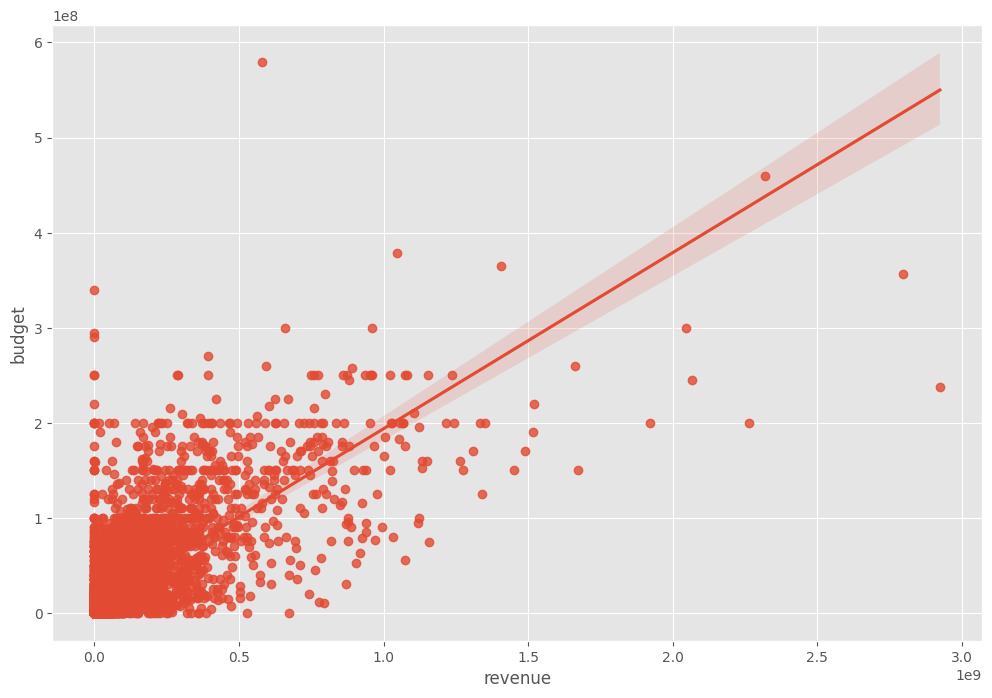

In [9]:
sns.regplot(x="revenue", y="budget", data=df)

<Axes: xlabel='vote_average', ylabel='revenue'>

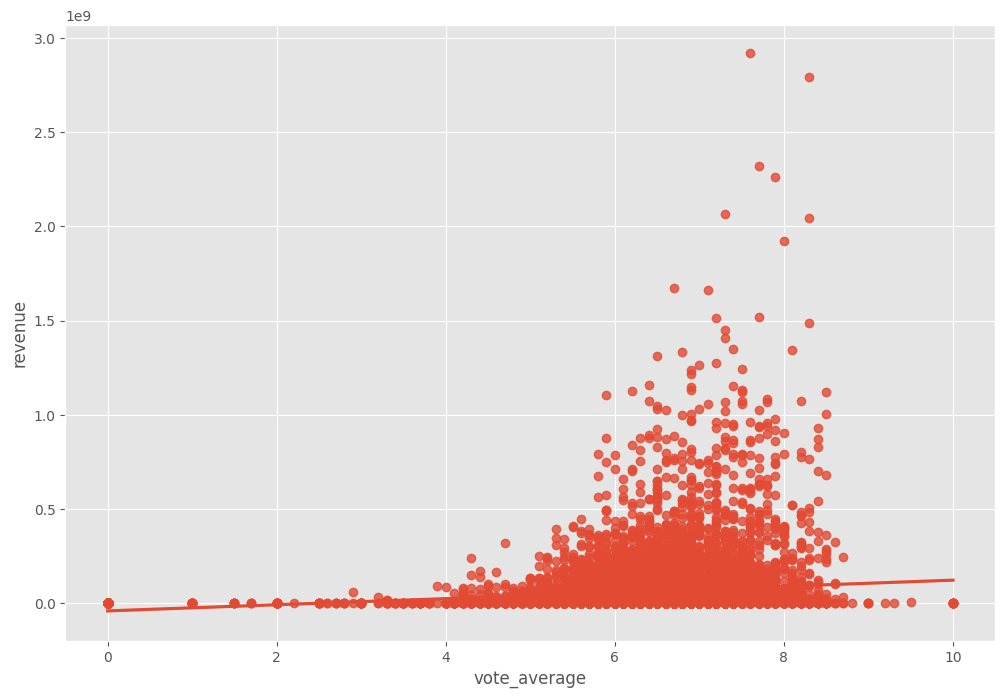

In [10]:
sns.regplot(x="vote_average", y="revenue", data=df)

# Correlation Matrix between all numeric columns

In [11]:
df.corr(method ='pearson', numeric_only=True)

,id,vote_average,vote_count,popularity,budget,revenue,runtime
id,1.000000,-0.241569,-0.259859,0.102688,-0.243411,-0.207591,-0.256838
vote_average,-0.241569,1.000000,0.253543,0.040162,0.074849,0.149643,0.388440
vote_count,-0.259859,0.253543,1.000000,0.069693,0.600121,0.753206,0.288462
popularity,0.102688,0.040162,0.069693,1.000000,0.143257,0.148195,0.038973
budget,-0.243411,0.074849,0.600121,0.143257,1.000000,0.735239,0.282498
revenue,-0.207591,0.149643,0.753206,0.148195,0.735239,1.000000,0.253162
runtime,-0.256838,0.388440,0.288462,0.038973,0.282498,0.253162,1.000000


In [12]:
df.corr(method ='kendall', numeric_only=True)

,id,vote_average,vote_count,popularity,budget,revenue,runtime
id,1.000000,-0.110563,-0.382295,0.054797,-0.351850,-0.385328,-0.158077
vote_average,-0.110563,1.000000,0.251397,0.086002,0.068562,0.143768,0.236027
vote_count,-0.382295,0.251397,1.000000,0.211810,0.544611,0.602620,0.288690
popularity,0.054797,0.086002,0.211810,1.000000,0.161447,0.181534,0.057210
budget,-0.351850,0.068562,0.544611,0.161447,1.000000,0.675868,0.292209
revenue,-0.385328,0.143768,0.602620,0.181534,0.675868,1.000000,0.303982
runtime,-0.158077,0.236027,0.288690,0.057210,0.292209,0.303982,1.000000


In [13]:
df.corr(method ='spearman', numeric_only=True)

,id,vote_average,vote_count,popularity,budget,revenue,runtime
id,1.000000,-0.158478,-0.544123,0.085102,-0.489270,-0.527500,-0.231076
vote_average,-0.158478,1.000000,0.354060,0.126274,0.095860,0.196585,0.328459
vote_count,-0.544123,0.354060,1.000000,0.290022,0.712484,0.765465,0.412567
popularity,0.085102,0.126274,0.290022,1.000000,0.215814,0.240817,0.084165
budget,-0.489270,0.095860,0.712484,0.215814,1.000000,0.799692,0.393010
revenue,-0.527500,0.196585,0.765465,0.240817,0.799692,1.000000,0.411716
runtime,-0.231076,0.328459,0.412567,0.084165,0.393010,0.411716,1.000000


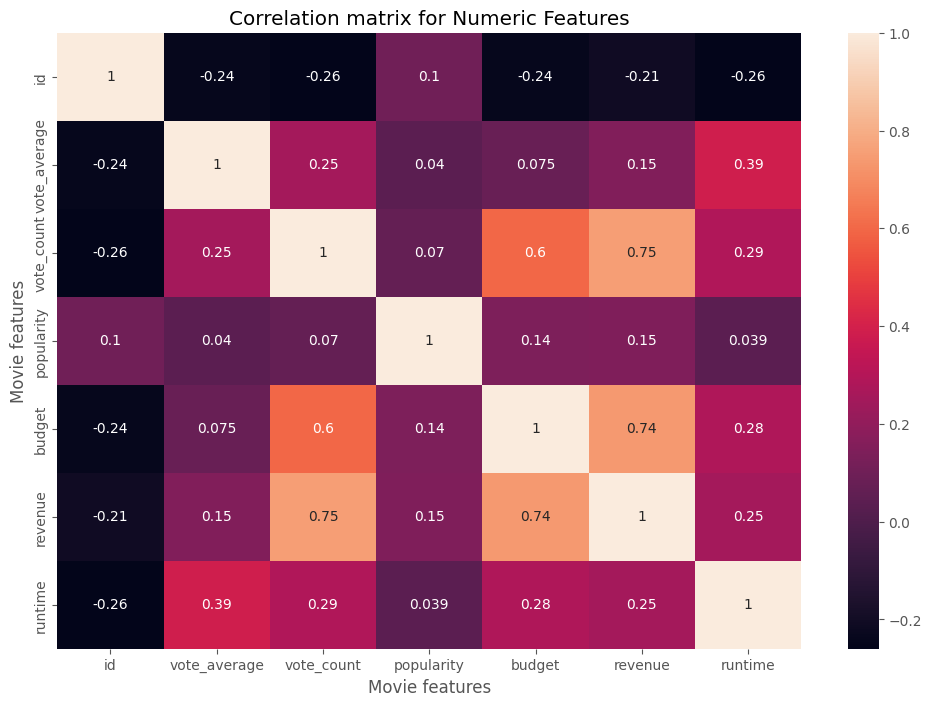

In [14]:
correlation_matrix = df.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

# Using factorize - this assigns a random numeric value for each unique categorical value


In [15]:
df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline
id,1.000000,0.968821,0.647907,0.259733,0.051401,0.039196,0.243979,0.970734,0.985464,0.092508,0.781892,0.386621,-0.005066,0.587700
title,0.968821,1.000000,0.623334,0.252255,0.052372,0.038873,0.241591,0.941152,0.956283,0.083098,0.758580,0.376496,-0.003946,0.564656
release_date,0.647907,0.623334,1.000000,0.228584,-0.029444,0.021080,0.284818,0.635920,0.643172,0.140198,0.503360,0.347620,0.006908,0.466112
genres,0.259733,0.252255,0.228584,1.000000,-0.022943,-0.043727,0.128643,0.258103,0.261827,0.019244,0.222083,0.124759,0.023617,0.173347
original_language,0.051401,0.052372,-0.029444,-0.022943,1.000000,0.052328,-0.194901,0.056105,0.034886,-0.002045,0.014200,-0.135442,0.060651,-0.182116
vote_average,0.039196,0.038873,0.021080,-0.043727,0.052328,1.000000,-0.129182,0.039823,0.034142,-0.051902,-0.021854,-0.096895,-0.024653,-0.023698
vote_count,0.243979,0.241591,0.284818,0.128643,-0.194901,-0.129182,1.000000,0.254894,0.256152,0.174610,0.314796,0.474017,-0.079151,0.394705
popularity,0.970734,0.941152,0.635920,0.258103,0.056105,0.039823,0.254894,1.000000,0.956269,0.093104,0.756142,0.371017,-0.004574,0.567987
overview,0.985464,0.956283,0.643172,0.261827,0.034886,0.034142,0.256152,0.956269,1.000000,0.098314,0.785556,0.394153,-0.010187,0.597199
budget,0.092508,0.083098,0.140198,0.019244,-0.002045,-0.051902,0.174610,0.093104,0.098314,1.000000,0.116318,0.255072,-0.012483,0.172583


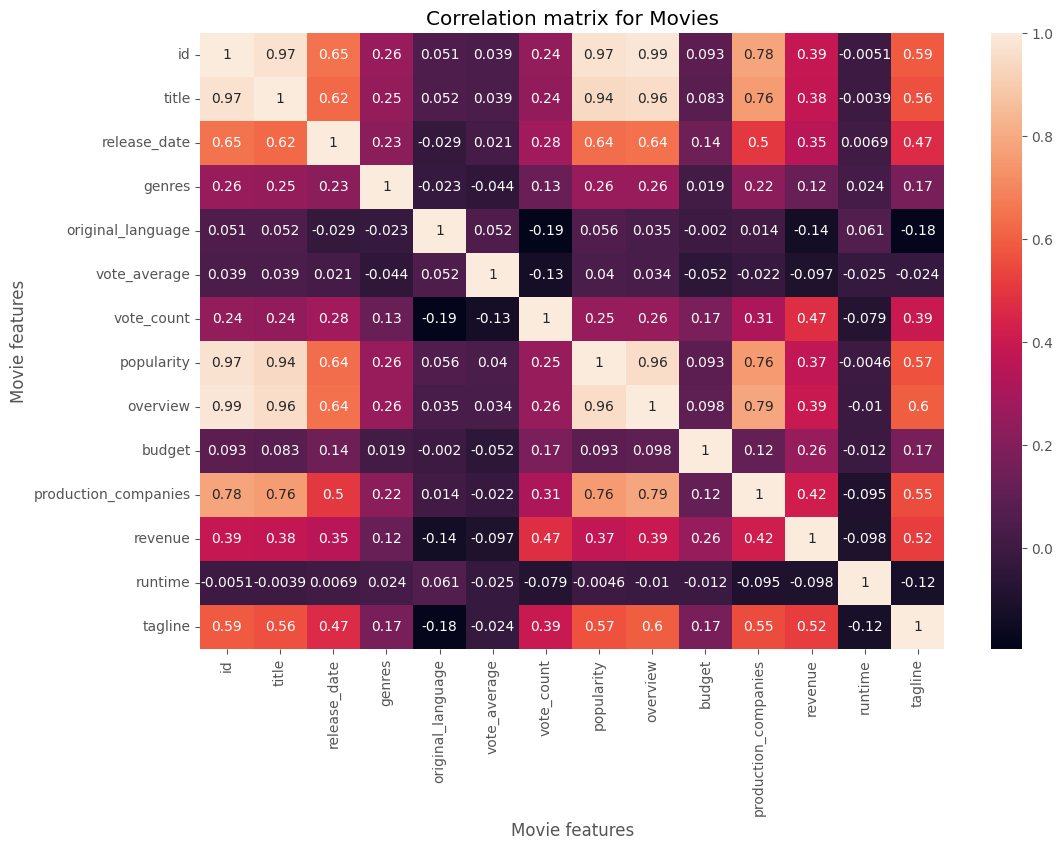

In [17]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson', numeric_only=True,)

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [18]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

id       id                      1.000000
         title                   0.968821
         release_date            0.647907
         genres                  0.259733
         original_language       0.051401
                                   ...   
tagline  budget                  0.172583
         production_companies    0.553138
         revenue                 0.518908
         runtime                -0.119126
         tagline                 1.000000
Length: 196, dtype: float64


In [19]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

original_language  vote_count          -0.194901
vote_count         original_language   -0.194901
tagline            original_language   -0.182116
original_language  tagline             -0.182116
revenue            original_language   -0.135442
                                          ...   
genres             genres               1.000000
release_date       release_date         1.000000
title              title                1.000000
runtime            runtime              1.000000
tagline            tagline              1.000000
Length: 196, dtype: float64


# We can now take a look at the ones that have a high correlation (> 0.5)

In [20]:
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

production_companies  release_date            0.503360
release_date          production_companies    0.503360
revenue               tagline                 0.518908
tagline               revenue                 0.518908
                      production_companies    0.553138
production_companies  tagline                 0.553138
tagline               title                   0.564656
title                 tagline                 0.564656
tagline               popularity              0.567987
popularity            tagline                 0.567987
tagline               id                      0.587700
id                    tagline                 0.587700
tagline               overview                0.597199
overview              tagline                 0.597199
release_date          title                   0.623334
title                 release_date            0.623334
popularity            release_date            0.635920
release_date          popularity              0.635920
          

# Looking at the top 15 companies by revenue

In [21]:
CompanyGrossSum = df.groupby('production_companies')[["revenue"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('revenue', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['revenue'].astype('int64') 

CompanyGrossSumSorted

production_companies
['Marvel Studios']                                                                           22387326699
['Pixar', 'Walt Disney Pictures']                                                             7934987635
['Lucasfilm Ltd.']                                                                            5923571989
['Warner Bros. Pictures', 'Heyday Films']                                                     4822844923
['Illumination', 'Universal Pictures']                                                        4752136567
['Walt Disney Pictures', 'Walt Disney Animation Studios']                                     4555669952
['Amblin Entertainment', 'Universal Pictures']                                                4211312736
['DreamWorks Animation', 'Paramount']                                                         4131753443
['Blue Sky Studios', '20th Century Fox Animation', '20th Century Fox']                        3934506069
['Walt Disney Pictures', 'Walt Dis

In [22]:
df['year'] = df['release_date'].astype('str').str[:4]

df

,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline,year
0,758323,The Pope's Exorcist,2023-04-05,"['Horror', 'Mystery', 'Thriller']",English,7.4,619,5089.969,"Father Gabriele Amorth, Chief Exorcist of the ...",18000000,"['Screen Gems', '2.0 Entertainment', 'Jesus & ...",65675816,103,Inspired by the actual files of Father Gabriel...,2023
1,640146,Ant-Man and the Wasp: Quantumania,2023-02-15,"['Action', 'Adventure', 'Science Fiction']",English,6.6,2294,4665.438,Super-Hero partners Scott Lang and Hope van Dy...,200000000,"['Marvel Studios', 'Kevin Feige Productions']",464566092,125,Witness the beginning of a new dynasty.,2023
2,502356,The Super Mario Bros. Movie,2023-04-05,"['Animation', 'Adventure', 'Family', 'Fantasy'...",English,7.5,1861,3935.550,"While working underground to fix a water main,...",100000000,"['Universal Pictures', 'Illumination', 'Ninten...",1121048165,92,NaN,2023
3,868759,Ghosted,2023-04-18,"['Action', 'Comedy', 'Romance']",English,7.2,652,2791.532,Salt-of-the-earth Cole falls head over heels f...,0,"['Skydance Media', 'Apple Studios']",0,120,Finding that special someone can be a real adv...,2023
4,594767,Shazam! Fury of the Gods,2023-03-15,"['Action', 'Comedy', 'Fantasy', 'Adventure']",English,6.8,1510,2702.593,"Billy Batson and his foster siblings, who tran...",125000000,"['New Line Cinema', 'The Safran Company', 'DC ...",133437105,130,Oh. My. Gods.,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,374473,"I, Daniel Blake",2016-10-21,['Drama'],English,7.7,1220,10.774,"A middle aged carpenter, who requires state we...",0,"['Why Not Productions', 'Wild Bunch', 'Sixteen...",15793051,100,NaN,2016
9996,16774,Hellboy Animated: Sword of Storms,2006-10-28,"['TV Movie', 'Fantasy', 'Animation', 'Action',...",English,6.3,99,12.739,A folklore professor becomes unwittingly posse...,0,"['IDT Entertainment', 'Film Roman']",0,73,NaN,2006
9997,13564,Return to House on Haunted Hill,2007-10-03,"['Horror', 'Thriller']",English,5.6,263,12.769,Eight years have passed since Sara Wolfe and E...,0,"['Dark Castle Entertainment', 'Warner Premiere']",0,81,NaN,2007
9998,482204,My Sister-in-law's Job,2017-08-31,"['Drama', 'Romance']",Korean,5.0,5,10.425,An erotic film that depicts the dangerous rela...,0,[],0,89,NaN,2017


In [23]:
df.groupby(['production_companies', 'year'])[["revenue"]].sum()

revenue
production_companies                               year           
["Centre du Cinéma et de l'Audiovisuel de la FW... 2017          0
["D'Antoni Productions", 'Schine-Moore Producti... 1971   41158757
["Dawn's Light", 'Rodin Entertainment', 'Underd... 2018          0
["Dreamin' Dolphin Film", 'Eagle Eye Filmproduk... 2019    4983582
["Eric's Boy", 'New Line Cinema', 'Team Todd', ... 2002  296938801
...                                                            ...
[]                                                 2020    2793857
                                                   2021   58364341
                                                   2022     356840
                                                   2023          0
                                                   nan           0

[9116 rows x 1 columns]

In [24]:
CompanyGrossSum = df.groupby(['production_companies', 'year'])[['revenue']].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['revenue','production_companies','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['revenue'].astype('int64') 

CompanyGrossSumSorted

production_companies                                                                       year
['Marvel Studios']                                                                         2018    4018839859
                                                                                           2019    3926148201
['Dune Entertainment', 'Lightstorm Entertainment', '20th Century Fox', 'Ingenious Media']  2009    2923706026
['20th Century Studios', 'Lightstorm Entertainment']                                       2022    2319331580
['Paramount', '20th Century Fox', 'Lightstorm Entertainment']                              1997    2264162353
['Lucasfilm Ltd.', 'Bad Robot']                                                            2015    2068223624
['Marvel Studios']                                                                         2015    1924715659
['Marvel Studios', 'Pascal Pictures', 'Columbia Pictures']                                 2021    1921847111
['Marvel Studios']      